In [2]:
import numpy as np

In [3]:
X_train = np.array([[1000.0, 2.0], [1500.0, 3.0]])
X_train

array([[1000.,    2.],
       [1500.,    3.]])

In [4]:
# grab all rows for the first column
X_train[:,0]

array([1000., 1500.])

In [5]:
# grab all the rows for the second column
X_train[:,1]

array([2., 3.])

In [6]:
# minimum value of the first column 
X_train[:,0].min()

1000.0

In [7]:
# another way to get the minimum value of the first column
np.min(X_train[:,0])

1000.0

In [9]:
# Average value of the first column
X_train[:,0].mean()

1250.0

In [10]:
# another way to find the average value of the first column 
np.mean(X_train[:,0])

1250.0

In [11]:
X_train[:,1].mean()

2.5

In [13]:
np.mean(X_train[:,1])

2.5

# Activity for Data Scaling: Max_Min Scaler
You will do this activity in groups of 4

A two dimensional array (Matrix) X is given, write a function max_min_s that for each column:

1. Obtains the minimum value of the column (min)
2. Obtains the range of the column (range)
3. For each value in the column, calculate the following: (value-min)/range

Remember: the range is the difference between the maximum element and minimum element of each column

Use this dataset as an example input to your function: X_train = np.array([[1000.0, 2.0], [1500.0, 3.0]])

We will use breakout rooms in Zoom for group work!

In [26]:
# X.min(axis=0) looks at one column at a time
def max_min_s(X):
    
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_train = np.array([[1000.0, 2.0], [1500.0, 3.0]])
print(max_min_s(X_train))

[[0. 0.]
 [1. 1.]]


# Use the Sklearn preprocessing package to do the same thing:

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() 
X_minmax = min_max_scaler.fit_transform(X_train)

print(X_minmax)

[[0. 0.]
 [1. 1.]]


# Activity for Data Scaling: Standard Scaler

A two dimensional array (Matrix) X is given, write a function that for each column:

1. Obtains the mean for the column (mean)
2. Obtain the standard deviation for the column (std)
3. For each value in the column, calculate the following: (value-mean)/std



In [33]:
# calculating mean column-wise: np.mean(X, axis=0) or X.mean(axis=0)

def standard_scaler(X):
    
    return (X - np.mean(X, axis=0)) / (X.std(axis=0))

print(standard_scaler(X_train))

[[-1. -1.]
 [ 1.  1.]]


## Use Sklearn preprocessing package to do the same thing:

In [34]:
standard_scaler = preprocessing.StandardScaler()
X_ss = standard_scaler.fit_transform(X_train)

print(X_ss)

[[-1. -1.]
 [ 1.  1.]]


## Data Preprocessing for Machine Learning: Label Encoding and One-Hot Encoding

* Label Encoding is when we convert categories to a numerical value. For example, the name of countries (France, Germany, Spain) into numbers(0,1,2)
* One-Hot Encoding convert the output of a label encoder (numbers) to a vector consisting only of 1s and 0s (positive/negative)

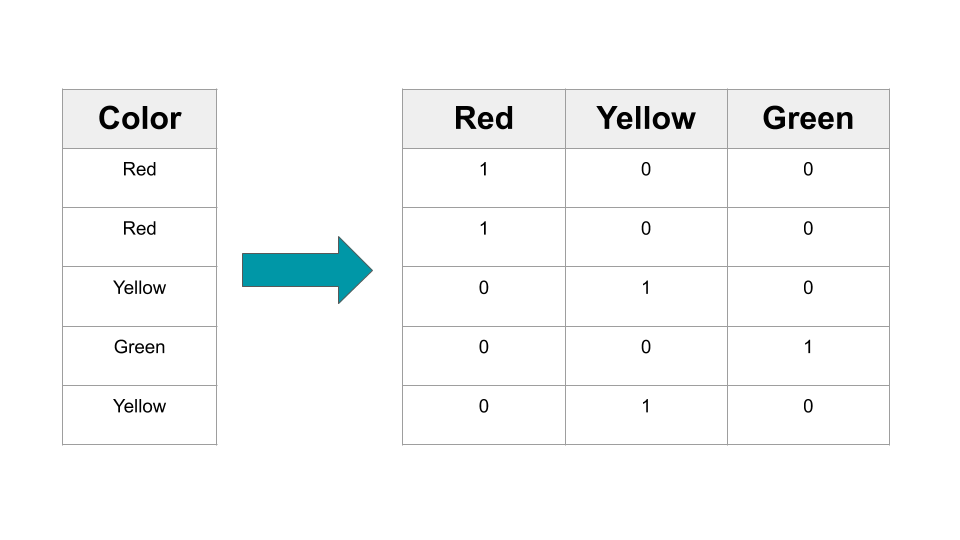

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv('Churn_Modelling.csv')

In [65]:
# print out the first 5 rows of each column in a readable format
# note: df.head() will not do that, must include print()
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

# Two columns have categorical values: Geography and Gender

In [70]:
# print the unique values from the Geography column
print(df['Geography'].unique())

['France' 'Spain' 'Germany']


In [71]:
# print the unique values from the Gender column
print(df['Gender'].unique())

['Female' 'Male']


## Define the feature matrix and target column

Target column: the column we are trying to predict values for. We will test against the values here to see if our predictions are accurate with the current data. Later, for new customers, we want to be able to predict the possibility that the custmer will exit based on the 10 features we are looking at in our matrix.

In [72]:
# Feature matrix
# We don't care about the first 3 columns (RowNumber, CustomerId, Surname),
# as those don't factor in to whether a person churns or not
X = df.iloc[:, 3:13].values

# Target column
# We want to predict the exit value,
# which therefore makes it our target column
y = df.iloc[:, 13].values

In [73]:
# print the first 10 rows of the feature matrix
print(X[0:10,:])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]
 [645 'Spain' 'Male' 44 8 113755.78 2 1 0 149756.71]
 [822 'France' 'Male' 50 7 0.0 2 1 1 10062.8]
 [376 'Germany' 'Female' 29 4 115046.74 4 1 0 119346.88]
 [501 'France' 'Male' 44 4 142051.07 2 0 1 74940.5]
 [684 'France' 'Male' 27 2 134603.88 1 1 1 71725.73]]


## Apply Label Encoder to the second and third columns

In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoder_X_1 = LabelEncoder()
X[:, 1] = label_encoder_X_1.fit_transform(X[:, 1]) # changing column 2
label_encoder_X_2 = LabelEncoder()
X[:, 2] = label_encoder_X_2.fit_transform(X[:, 2]) # changing column 3
print(X[0:10,:])
print(X.shape)

[[619 0 0 42 2 0.0 1 1 1 101348.88]
 [608 2 0 41 1 83807.86 1 0 1 112542.58]
 [502 0 0 42 8 159660.8 3 1 0 113931.57]
 [699 0 0 39 1 0.0 2 0 0 93826.63]
 [850 2 0 43 2 125510.82 1 1 1 79084.1]
 [645 2 1 44 8 113755.78 2 1 0 149756.71]
 [822 0 1 50 7 0.0 2 1 1 10062.8]
 [376 1 0 29 4 115046.74 4 1 0 119346.88]
 [501 0 1 44 4 142051.07 2 0 1 74940.5]
 [684 0 1 27 2 134603.88 1 1 1 71725.73]]
(10000, 10)


### LabelEnconder has replaced France with 0, Germany with 1, and Spain with 2. 

In [75]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(categorical_features=[1, 2])
X = one_hot_encoder.fit_transform(X).toarray()
print(pd.DataFrame(X[0:10,:]))

     0    1    2    3    4      5     6    7          8    9   10   11  \
0  1.0  0.0  0.0  1.0  0.0  619.0  42.0  2.0       0.00  1.0  1.0  1.0   
1  0.0  0.0  1.0  1.0  0.0  608.0  41.0  1.0   83807.86  1.0  0.0  1.0   
2  1.0  0.0  0.0  1.0  0.0  502.0  42.0  8.0  159660.80  3.0  1.0  0.0   
3  1.0  0.0  0.0  1.0  0.0  699.0  39.0  1.0       0.00  2.0  0.0  0.0   
4  0.0  0.0  1.0  1.0  0.0  850.0  43.0  2.0  125510.82  1.0  1.0  1.0   
5  0.0  0.0  1.0  0.0  1.0  645.0  44.0  8.0  113755.78  2.0  1.0  0.0   
6  1.0  0.0  0.0  0.0  1.0  822.0  50.0  7.0       0.00  2.0  1.0  1.0   
7  0.0  1.0  0.0  1.0  0.0  376.0  29.0  4.0  115046.74  4.0  1.0  0.0   
8  1.0  0.0  0.0  0.0  1.0  501.0  44.0  4.0  142051.07  2.0  0.0  1.0   
9  1.0  0.0  0.0  0.0  1.0  684.0  27.0  2.0  134603.88  1.0  1.0  1.0   

          12  
0  101348.88  
1  112542.58  
2  113931.57  
3   93826.63  
4   79084.10  
5  149756.71  
6   10062.80  
7  119346.88  
8   74940.50  
9   71725.73  


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## We can do Label encoding and one-hot encoding at the same time in Pandas
* OneHotEncoder changes the order of the data and can be hard to read so recommended to use this instead

In [60]:
import pandas as pd

X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
pd.get_dummies(X).head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,1,0,0,0,1
